# Parte A

## Ejercicio 2

In [7]:
import numpy as np
import control

In [273]:
i0 = 1
L1 = 3.5
L2 = 2
Rc = 1
Rw = 3
alpha = 0.9
a = 50

const = 1/((1-alpha*alpha)*L1*L2)
K = alpha * np.sqrt(L1*L2) 
A = const * np.array([
    [-L2*Rc, alpha*np.sqrt(L1*L2)*Rw],
    [alpha*np.sqrt(L1*L2)*Rc, -L1*Rw]
])
B = const * np.array([[L2], [-K]])

In [274]:
kalman = control.ctrb(A, B)
rank_kalman = np.linalg.matrix_rank(kalman)
print("Kalman:", kalman)
print("Rango de kalman:", rank_kalman)

Kalman: [[  1.5037594  -11.87743796]
 [ -1.79035803  16.82667321]]
Rango de kalman: 2


> El sistema es controlable

## Ejercicio 3

In [275]:
u_cte = lambda t: 0.5
sol_u = solve_ivp(lambda t, x: x @ A + B.T * u_cte(t), [0, 50], [-i0, 0], max_step=0.01)

In [276]:
dx1 = (sol_u.y[0,:-1] - sol_u.y[0,1:])/(sol_u.t[:-1]-sol_u.t[1:])
dx2 = (sol_u.y[1,:-1] - sol_u.y[1,1:])/(sol_u.t[:-1]-sol_u.t[1:])

Text(0.5, 0, '$t$')

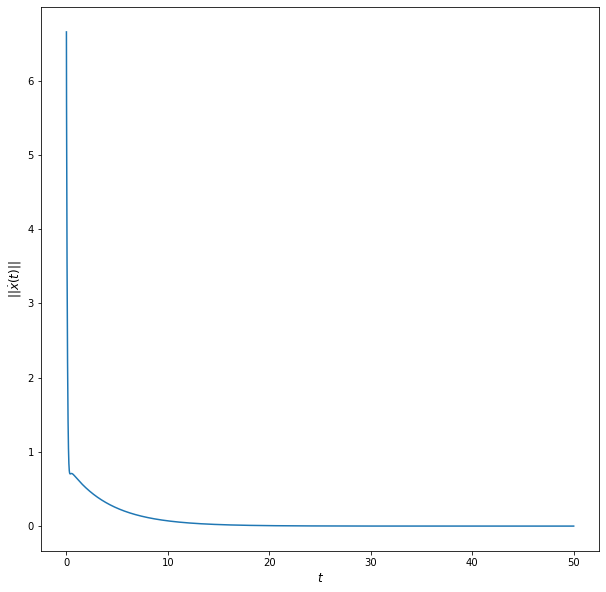

In [277]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(sol_u.t[:-1], np.sqrt(dx1**2 + dx2 **2))
ax.set_ylabel(r'$||\dot{x}(t)||$', fontsize=12)
ax.set_xlabel('$t$', fontsize=12)

## Ejercicio 4

El problema se puede escribir como

$$
min_{T, u} T
$$

sujeto a 

$$
\begin{align*}
i' &= Ai + Bu\\
i(T; i(0), u) &= (i_0, 0)^T\\
i(0) &= (-i_0, 0)^T\\
u &\in [-a, a]
\end{align*}
$$

In [26]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## Ejercicio 5

In [190]:
N=100

In [278]:
def g(x):
    tf, u = x[0], x[1:]
    I0 = np.array([[-i0], [0]])
#     print(I0.shape)
    I = I0
    dt = tf/N
    for it in range(N):
        I = I + dt * (A @ I + u[it] * B)
    return I[0,0], I[1, 0]

In [279]:
def obj(x):
    return x[0]

In [280]:
from scipy.optimize import minimize, NonlinearConstraint, LinearConstraint

In [281]:
x0 = np.array([0.001]+[0]*N)
eps = 0.000001
xf = np.array([i0, 0])
g(x0)

(-0.9985021024699596, -0.0017820536906994402)

In [282]:
%%time
sol_N = minimize(
    obj,
    x0 = x0,
    method="COBYLA",
    constraints=[
        NonlinearConstraint(g, xf-eps, xf+eps), 
        LinearConstraint(np.eye(N+1), 
                         lb=np.array([0]+[-a]*N), 
                         ub=np.array([np.inf]+[a]*N)
                        )],
    options = {"maxiter": 10000}
)
sol_N

Wall time: 50.4 s


     fun: 0.6465911912078925
   maxcv: 3.0844247658341376e-05
 message: 'Maximum number of function evaluations has been exceeded.'
    nfev: 10000
  status: 2
 success: False
       x: array([  0.64659119,  14.05783356,  15.66717657,  14.46937688,
        16.03232447,  12.09649756,  13.92083561,  12.94775797,
        14.74299664,  14.81334356,  15.39837589,  14.50554925,
        14.90118163,  15.02462307,  16.00140884,  14.7190706 ,
        15.92434587,  16.27180716,  15.83674066,  15.61713236,
        16.35574434,  16.06061909,  15.78071246,  16.37040428,
        15.1178658 ,  16.83500072,  16.69727951,  15.98073632,
        15.51134126,  16.9681576 ,  15.93857652,  16.38523147,
        17.42117062,  16.98818266,  16.17135799,  16.42296453,
        16.79352558,  17.38882038,  17.43350303,  18.17371702,
        16.73632205,  17.05554193,  16.18566856,  17.58451473,
        16.33929477,  17.24518651,  16.80450758,  17.45733315,
        17.33327845,  18.34135094,  17.07264881,  15.70382

In [283]:
u = sol_N.x
g(u)

(1.000008439975021, -3.1844247658341374e-05)

La solución obtenida satisface que llega cerca de la posicion final deseada, sin embargo el control asociado no es extremal. Esto puede deberse a la mala elección del punto inicial (compatibilidad de tf0 y u0) y los parametros elegidos (N y eps)

##  Ejercicio 6

In [284]:
x0 = np.array([0.1]+[0]*N)
eps = 0.000001
xf = np.array([i0, 0])
g(x0)

(-0.894204634121192, -0.11597893177180023)

In [285]:
%%time
sol_N = minimize(
    obj,
    x0 = x0,
    method="COBYLA",
    constraints=[
        NonlinearConstraint(g, xf-eps, xf+eps), 
        LinearConstraint(np.eye(N+1), 
                         lb=np.array([0]+[-a]*N), 
                         ub=np.array([np.inf]+[a]*N)
                        )],
    options = {"maxiter": 10000}
)
sol_N

Wall time: 51.6 s


     fun: 0.5933564109285158
   maxcv: 3.2776615038338956e-05
 message: 'Maximum number of function evaluations has been exceeded.'
    nfev: 10000
  status: 2
 success: False
       x: array([  0.59335641,  14.24304437,  13.92315386,  16.24278127,
        15.60637336,  15.94684118,  15.63284548,  15.9933171 ,
        16.28950783,  16.52098705,  17.8102884 ,  17.8376135 ,
        17.85824801,  16.47734768,  17.87853449,  17.82640625,
        17.0102033 ,  16.85671457,  17.30933377,  18.66727689,
        17.43576015,  18.36115545,  18.32044635,  18.65533479,
        17.81388902,  18.68259407,  18.23702446,  17.91020453,
        17.43326581,  18.13966547,  17.35257795,  17.57799026,
        18.92181589,  18.26414003,  18.7864322 ,  18.45257878,
        19.19665599,  19.31798263,  19.09306152,  17.77214994,
        18.61607093,  17.84493805,  18.38461318,  19.22296295,
        19.42859858,  19.95444858,  19.69801268,  19.49938905,
        19.09574891,  19.3271273 ,  19.07523626,  20.70322

In [286]:
u = sol_N.x
g(u)

(1.0000102138106983, -3.377661503833895e-05)

# Parte B

## Ejercicio 7

In [219]:
from scipy.optimize import root

In [287]:
def F(x):
    tf, h = x[0], x[1]
    p = solve_ivp(lambda t, p: -A.T @ p, t_span=[0, tf], y0=[-1, h], max_step=0.001, dense_output=True)  
    u = lambda t: a * np.sign(p.sol(t).T @ B)[0]
    x = solve_ivp(lambda t, x: x @ A + u(t)*B.T, t_span=[0, tf], y0=[-i0, 0], max_step=0.001)
    return x.y[0,-1]-i0, x.y[1,-1]

In [ ]:
%%time
R = root(F, x0=(5,-1), method="krylov")
R

In [ ]:
F(R.x)